# House sales in King County

## Miguel Ángel Canela, IESE Business School

******

### Introduction

This example illustrates **linear regression** in Python, using the library scikit-learn, which contains a collection of ML methods, both supervised and unsupervised. If you are using Python but you want linear regression with a statistical flavor ($p$-values, confidence limits, normality tests, etc), a good choice would be the library **StatsModels**.

The objective is to develop a model for house sale prices in King County (Washington), which includes Seattle. It is the most populous county in Washington (population 1,931,249 in the 2010 census), and the 13th-most populous in the United States. The data set include 21,613 homes sold between May 2014 and May 2015. It contains an id field, the date the house was sold, the sale price and 13 house features:

* `id`, an identifier of the house.

* `date`, the date when the sale took place, in a curious format commented below.

* `price`, the sale price in US dollars.

* `bedrooms`, the number of bedrooms.

* `bathrooms`, the number of bathrooms.

* `sqft_above`, the square footage of the home, discounting the basement.

* `sqft_basement`, the square footage of the basement.

* `sqft_lot`, the square footage of the lot.

* `floors`, the total floors (levels) in house.

* `waterfront`, a dummy for having a view to the waterfront.

* `condition`, a 1-5 rating.

* `yr_built`, the year when the house was built.

* `yr_renovated`, the year when the house was renovated.

* `zipcode`, the ZIP code of the house.

* `lat`, the latitude of the house.

* `long`, the longitude of the house.

### Importing the data

I import the data from a CSV file, checking the dimensions.


In [1]:
import pandas as pd
fname = 'https://raw.githubusercontent.com/mcanela-iese/ML_Course/master/Data/' \
    'king.csv'
df = pd.read_csv(fname)
df.shape

(21613, 16)

`df` is a data frame, with 21,613 rows and 16 columns. The first column has many **duplicates**, which are not duplicates for the data frame. This means that the same house may have been sold more than once during the period covered by the data.

In [2]:
df['id'].duplicated().sum()

177

In [3]:
df.duplicated().sum()

0

With the function `info`, we take a look at the columns of this data frame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
id               21613 non-null int64
date             21613 non-null object
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
condition        21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
price            21613 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.6+ MB


Note the format of `date`. '20140502T000000' must be read as '2014-05-02 00:00:00', which is the standard **datetime format**. The 'T' indicates the beginning of the time part. Since '20140502T000000' contains a non-numeric character, it is imported as a string.

I rescale the prices, to get simpler figures.

In [5]:
df['price'] = df['price']/1000

A summary of the data helps. I use the function `describe`, omitting `id`, `zipcode` and `date`, which would not make sense (`date` would have been ignored by `describe`, which does not take non-numeric columns). Note that, for a dummy like `waterfront`, the mean is just the proportion of 1's. So, 0.75% of the houses have a view to the waterfront. The rest is easy.

In [6]:
df.iloc[:, 3:18].describe().round(1)

,lat,long,bedrooms,bathrooms,sqft_above,sqft_basement,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,price
count,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,47.6,-122.2,3.4,2.1,1788.4,291.5,15107.0,1.5,0.0,3.4,1971.0,84.4,540.1
std,0.1,0.1,0.9,0.8,828.1,442.6,41420.5,0.5,0.1,0.7,29.4,401.7,367.1
min,47.2,-122.5,0.0,0.0,290.0,0.0,520.0,1.0,0.0,1.0,1900.0,0.0,75.0
25%,47.5,-122.3,3.0,1.8,1190.0,0.0,5040.0,1.0,0.0,3.0,1951.0,0.0,322.0
50%,47.6,-122.2,3.0,2.2,1560.0,0.0,7618.0,1.5,0.0,3.0,1975.0,0.0,450.0
75%,47.7,-122.1,4.0,2.5,2210.0,560.0,10688.0,2.0,0.0,4.0,1997.0,0.0,645.0
max,47.8,-121.3,33.0,8.0,9410.0,4820.0,1651359.0,3.5,1.0,5.0,2015.0,2015.0,7700.0


### Linear regression model

To apply a supervised learning method in scikit-learn, we have to specify the **target vector** `y` and the **feature matrix** `X`. The columns of `X` have to be numeric, but `y` can be a string vector in a classification model. 

In [7]:
y = df['price']
X = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition',
  'sqft_above', 'sqft_basement', 'sqft_lot', 'yr_built', 'yr_renovated',
  'lat', 'long']]

scikit-learn (`sklearn` in the code) contains the module `linear_model`, with various regression methods. I load only the **class** `LinearRegression()`, with its default parameters, which I call `linreg`. In Python, a class is like an object constructor, or a "blueprint" for creating objects. This class comes with **methods**, which are functions that only make sense for this class. In this example, I apply three methods of the class `linreg`, namely `fit`, `predict`and `score`. The same approach will work for other supervised learning methods.

In [8]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

For `linreg`, the method `fit` fits a linear equation to the data, using the **least squares method**.

In [9]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, the equation has been fitted to the data. The **predicted values** are obtained with the method `predict`. 

In [10]:
df['pred_price'] = linreg.predict(X)

Finally, the method `score` quantifies the quality of the predictions, which in this class is done with an **R-squared statistic**.

In [11]:
linreg.score(X, y).round(3)

0.646

Indeed, this is the square of the correlation of the price and the predicted price:

In [12]:
r = df[['price', 'pred_price']].corr().iloc[0, 1]
round(r**2, 3)

0.646

### Graphics

I use the module `matplotlib.pyplot` for plotting, as usual.

In [13]:
import matplotlib.pyplot as plt

The price has a (very) **skewed distribution**, as shown in the exhibit below. 

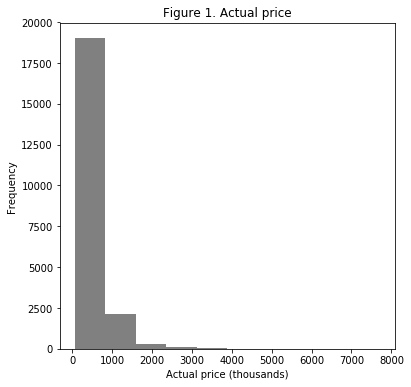

In [14]:
df['price'].plot.hist(title='Figure 1. Actual price', figsize=(6,6), color='0.5')
plt.xlabel('Actual price (thousands)')
plt.show()

The prediction error can be calculated as

In [15]:
df['pred_error'] = df['price'] - df['pred_price']

The histogram of the prediction error reveals very extreme values, although the distribution is reasonably symmetric.

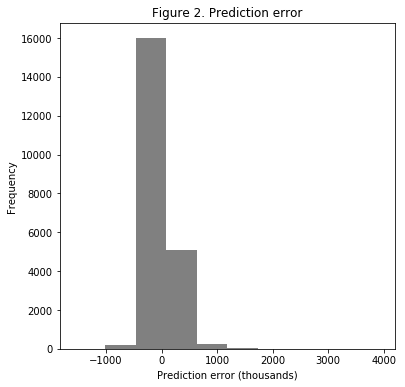

In [16]:
df['pred_error'].plot.hist(title='Figure 2. Prediction error', figsize=(6,6), color='0.5')
plt.xlabel('Prediction error (thousands)')
plt.show()

Scatter plots with the predicted values in the horizontal axis and either the actual values or the prediction errors in the vertical axis are useful to detect problems in the models fitted. I leave the discussion of this plot for the homework.

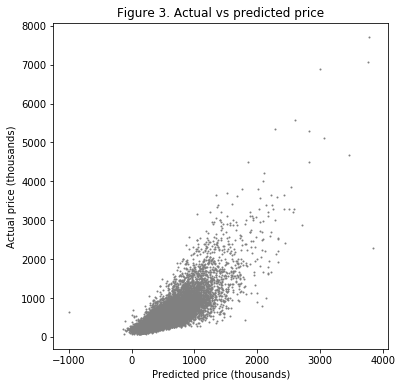

In [17]:
df.plot.scatter(x='pred_price', y='price', title='Figure 3. Actual vs predicted price',
    figsize=(6,6), color='0.5', s=1)
plt.xlabel('Predicted price (thousands)')
plt.ylabel('Actual price (thousands)')
plt.show()